In [67]:
import numpy as np
import matplotlib.pyplot as plt

In [68]:
def kmeans(data: np.ndarray, n_cl: int):
    """
    K-means clustering
    :param data: np.ndarray of shape (n_samples, n_features)
    :param n_cl: number of clusters
    :return: np.ndarray of shape (n_samples,) with cluster indices
    """
    n_samples, n_features = data.shape
    
    # Initialize cluster centers
    # centers = data[np.random.choice(n_samples, n_cl, replace=False)]
    centers = [[0,4], [3,3]]

    # Initialize cluster indices
    clusters = np.zeros(n_samples, dtype=int)

    # Initialize distances
    distances = np.zeros((n_samples, n_cl))

    # Main loop
    loop = 0
    while True:
        loop += 1
        print(f"Loop {loop}:")

        print(f"Centers: {centers[0]}, {centers[1]}")

        # Compute distances
        for i in range(n_cl):
            distances[:, i] = np.linalg.norm(data - centers[i], axis=1)
        print(f"Distances:\n{distances}")

        # Assign clusters
        new_clusters = np.argmin(distances, axis=1)
        print(f"new_Clusters: {new_clusters}")

        print()

        # Check for convergence
        if np.all(new_clusters == clusters):
            break
        clusters = new_clusters

        # Update cluster centers
        for i in range(n_cl):
            centers[i] = np.mean(data[clusters == i], axis=0)

    return clusters


In [69]:
data = np.array([[5,1], [5,2], [4,1], [4,2], [1,3], [1,4], [2,3], [2,4]])

clusters = kmeans(data, 2)

print(f"Final clusters: {clusters}")

Loop 1:
Centers: [0, 4], [3, 3]
Distances:
[[5.83095189 2.82842712]
 [5.38516481 2.23606798]
 [5.         2.23606798]
 [4.47213595 1.41421356]
 [1.41421356 2.        ]
 [1.         2.23606798]
 [2.23606798 1.        ]
 [2.         1.41421356]]
new_Clusters: [1 1 1 1 0 0 1 1]

Loop 2:
Centers: [1.  3.5], [3.66666667 2.16666667]
Distances:
[[4.71699057 1.77169097]
 [4.27200187 1.34370962]
 [3.90512484 1.21335165]
 [3.35410197 0.372678  ]
 [0.5        2.79384244]
 [0.5        3.23608131]
 [1.11803399 1.86338998]
 [1.11803399 2.47767812]]
new_Clusters: [1 1 1 1 0 0 0 0]

Loop 3:
Centers: [1.5 3.5], [4.5 1.5]
Distances:
[[4.30116263 0.70710678]
 [3.80788655 0.70710678]
 [3.53553391 0.70710678]
 [2.91547595 0.70710678]
 [0.70710678 3.80788655]
 [0.70710678 4.30116263]
 [0.70710678 2.91547595]
 [0.70710678 3.53553391]]
new_Clusters: [1 1 1 1 0 0 0 0]

Final clusters: [1 1 1 1 0 0 0 0]


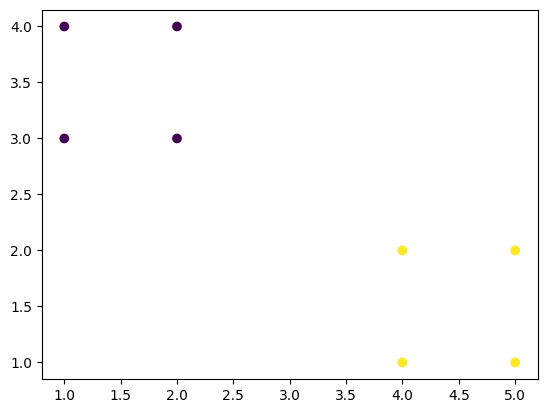

In [70]:
# draw the data points
plt.scatter(data[:, 0], data[:, 1], c=clusters)
plt.show()